# Machine Learning
- Data Science
- Artifical Intelligence
- Machine Learning
    - supervised
        - regression
        - classification
    - unsupervised
        - clustering
        - anomaly detection
        - dimension reduction
    - reinforced
        - deep learning
            - ANN artificial neural network

apa kegunaan machine learning?

# Linear Regression
mencoba menarik sebuah garis "trend" dari banyak data yang ada

## Simple Linear Regression

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

import pandas as pd

In [3]:
# bikin dummy data untuk dibuat linear regressionnya
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([5,20,14,32,22,38])

print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


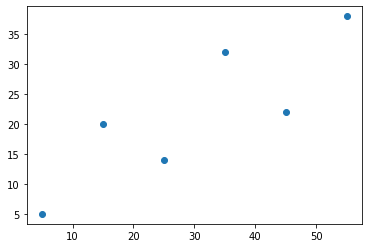

In [21]:
plt.scatter(x,y)

In [4]:
# bikin model
model1 = LinearRegression()

In [5]:
# training (fit) model
model1.fit(x,y)

LinearRegression()

In [10]:
# evaluasi model, lihat skor r2 nya
r2 = model1.score(x,y)
print(r2)

0.7158756137479542


In [27]:
print(model1.intercept_)
print(model1.coef_)

5.633333333333329
[0.54]


In [29]:
# y = ax + b
n = 20
# y = 0.54*(n) + 5.63339
model1.coef_[0] * n + model1.intercept_

16.43333333333333

In [12]:
# bikin prediksi
hasil_prediksi = model1.predict(x)
print(hasil_prediksi)

# buat jumlah desimal jadi 2 saja
print(hasil_prediksi.round(2))

[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
[ 8.33 13.73 19.13 24.53 29.93 35.33]


Text(0, 0.5, 'harga rumah')

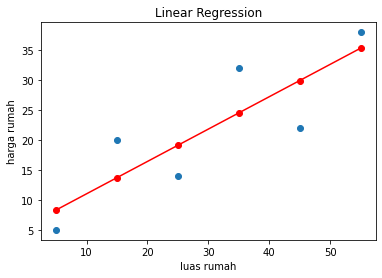

In [24]:
plt.scatter(x,y)
plt.plot(x,hasil_prediksi, color="red")
plt.scatter(x,hasil_prediksi, color="red")

plt.title("Linear Regression")
plt.xlabel("luas rumah")
plt.ylabel("harga rumah")

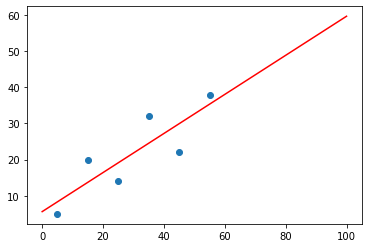

In [35]:
x2 = np.arange(0,101).reshape(-1,1)
hasil2 = model1.predict(x2)
plt.scatter(x,y)
plt.plot(x2,hasil2, color="red")
# plt.scatter(x2,hasil2, color="red", alpha=0.25)

In [20]:
model1.predict([[10]])

array([11.03333333])

In [16]:
print(x)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]


In [15]:
n = np.array([5.555555555555555555])
n.round(3)

array([5.556])

## Linear Regression dengan 2 fitur
Multiple Linear Regression

In [36]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [37]:
# bikin model, dan train model (fit)
model2 = LinearRegression().fit(x,y)

In [39]:
# evaluasi model nya, lihat skor r2
model2.score(x,y)

0.8615939258756776

In [40]:
# y = ax0 + bx1 + c
# y = a* luas tanah + b *luas rumah + intercept
# f(x) = coef_[0] * x0 + coef_[1] * x1 + intercept_

In [41]:
hasil_prediksi = model2.predict(x)
print(hasil_prediksi)

[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [49]:
pd.DataFrame({
    "luas tanah":x.T[0],
    "luas rumah":x.T[1],
    "harga rumah": y, 
    "prediksi": hasil_prediksi
})

,luas tanah,luas rumah,harga rumah,prediksi
0,0,1,4,5.777605
1,5,1,5,8.012953
2,15,2,20,12.738675
3,25,5,14,17.974448
4,35,11,32,23.975297
5,45,15,22,29.466096
6,55,34,38,38.782276
7,60,35,43,41.272650


Text(0, 0.5, 'harga rumah')

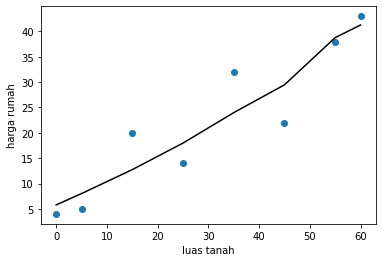

In [51]:
plt.scatter(x.T[0], y)
plt.plot(x.T[0], hasil_prediksi, color="black")

plt.xlabel("luas tanah")
plt.ylabel("harga rumah")

Text(0, 0.5, 'harga rumah')

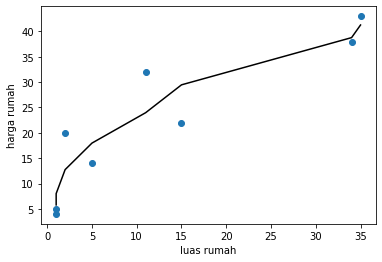

In [52]:
plt.scatter(x.T[1], y)
plt.plot(x.T[1], hasil_prediksi, color="black")

plt.xlabel("luas rumah")
plt.ylabel("harga rumah")

In [60]:
# mencoba dengan dataframe - bisa, tidak harus numpy array
df_x = pd.DataFrame({
    "luas tanah":x.T[0],
    "luas rumah":x.T[1],
    "harga rumah": y
})
df_x

,luas tanah,luas rumah,harga rumah
0,0,1,4
1,5,1,5
2,15,2,20
3,25,5,14
4,35,11,32
5,45,15,22
6,55,34,38
7,60,35,43


In [56]:
# bikin model
model3 = LinearRegression().fit(df_x[['luas tanah','luas rumah']], df_x['harga rumah'])

In [58]:
# evaluasi model
model3.score(df_x[['luas tanah','luas rumah']], df_x['harga rumah'])

0.8615939258756776

In [59]:
# bikin prediksi
model3.predict(df_x[['luas tanah','luas rumah']])

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

# Polynomial Regression

### mencoba menjelaskan kenapa polynomial regression berbeda secara signifikan dibanding simple/multiple regression

karena garisnya akan berbelok

y = a* luas_tanah + b * luas_rumah * luas_rumah + intercept

misal luas_rumah 10, luas_tanah 50
harganya berapa?
y = 5 * 50 + 5 * 10 * 10 + 123

misal luas_rumah 10, luas_tanah 51
y = 5 * 51 + 5 * 10 * 10 + 123

misal luas_rumah 11, luas_tanah 50
y = 5 * 50 + 5 * 11 * 11 + 123

In [61]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [62]:
# bikin dummy data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


In [64]:
# transform datanya
transformer = PolynomialFeatures(degree=2, include_bias=False)

#transform datanya di fit juga
transformer.fit(x)

# setelah itu, kita buat x baru yang sudah di transform
x_baru = transformer.transform(x)

jika menggunakan scikit learn punya LinearRegression, itu sudah include bias. Jadi, di PolynomialFeatures nya, jangan di include lagi.

jika kita pakai package statsmodels.sm.OLS, itu belum include bias. Jadi, di PolynomialFeatures nya, kita include bias.

In [65]:
print(x_baru)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [66]:
# bikin model, train model (fit)
model_p = LinearRegression().fit(x_baru, y)

In [68]:
# evaluasi model
model_p.score(x_baru, y)

0.8908516262498563

In [69]:
# bikin prediksi
y_pred = model_p.predict(x_baru)

In [71]:
df_x = pd.DataFrame({
    "x":x_baru.T[0],
    "x2": x_baru.T[1],
    "y":y,
    "prediksi": y_pred
})
df_x

,x,x2,y,prediksi
0,5.0,25.0,15,15.464286
1,15.0,225.0,11,7.907143
2,25.0,625.0,2,6.028571
3,35.0,1225.0,8,9.828571
4,45.0,2025.0,25,19.307143
5,55.0,3025.0,32,34.464286


Text(0, 0.5, 'y')

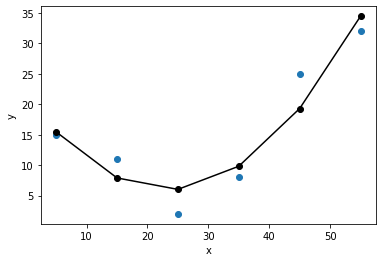

In [74]:
plt.scatter(df_x['x'],df_x['y'])
plt.plot(df_x['x'],df_x['prediksi'], color="black")
plt.scatter(df_x['x'],df_x['prediksi'], color="black")

plt.xlabel("x")
plt.ylabel("y")

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]
r2: 0.9996871368552784


Text(0.5, 1.0, 'polynomial regression degree 4')

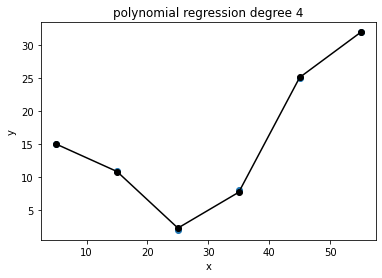

In [100]:
# Gimana kalau datanya sama, tapi
# polynomial regression nya degree 4?

# bikin dummy data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)
print(y)

# transform datanya
transformer = PolynomialFeatures(degree=4, include_bias=False)

#transform datanya di fit juga
transformer.fit(x)

# setelah itu, kita buat x baru yang sudah di transform
x_baru = transformer.transform(x)

# bikin model, train model (fit)
model_p = LinearRegression().fit(x_baru, y)

# evaluasi model
print("r2:", model_p.score(x_baru, y))

# bikin prediksi
y_pred = model_p.predict(x_baru)

# visualisasi
df_x = pd.DataFrame({
    "x":x_baru.T[0],
    "x2": x_baru.T[1],
    "y":y,
    "prediksi": y_pred
})

plt.scatter(df_x['x'],df_x['y'])
plt.plot(df_x['x'],df_x['prediksi'], color="black")
plt.scatter(df_x['x'],df_x['prediksi'], color="black")

plt.xlabel("x")
plt.ylabel("y")
plt.title("polynomial regression degree 4")

Text(0.5, 1.0, 'polynomial regression degree 4')

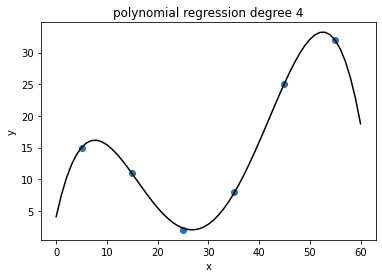

In [103]:
x60 = np.arange(61).reshape((-1,1))
x_baru_60 = transformer.transform(x60)
y_pred_60 = model_p.predict(x_baru_60)

plt.scatter(df_x['x'],df_x['y'])
plt.plot(x60, y_pred_60, color="black")

plt.xlabel("x")
plt.ylabel("y")
plt.title("polynomial regression degree 4")

## Polynomial dan Multiple Linear Regression

In [75]:
# import package
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [76]:
# bikin data
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [78]:
# transform data, fit transform nya
x_ = PolynomialFeatures(degree=2, include_bias=False)
x_ = x_.fit_transform(x)

In [79]:
# bikin model, train model (fit)
model5 = LinearRegression().fit(x_, y)

In [81]:
# evaluasi model
model5.score(x_, y)

0.9453701449127823

In [82]:
# bikin prediksi
y_pred = model5.predict(x_)

In [86]:
df_x = pd.DataFrame(x_)
df_x['y'] = y
df_x['prediksi'] = y_pred
df_x

,0,1,2,3,4,y,prediksi
0,0.0,1.0,0.0,0.0,1.0,4,0.540474
1,5.0,1.0,25.0,5.0,1.0,5,11.363403
2,15.0,2.0,225.0,30.0,4.0,20,16.078096
3,25.0,5.0,625.0,125.0,25.0,14,15.791390
4,35.0,11.0,1225.0,385.0,121.0,32,29.738586
5,45.0,15.0,2025.0,675.0,225.0,22,23.508346
6,55.0,34.0,3025.0,1870.0,1156.0,38,39.056314
7,60.0,35.0,3600.0,2100.0,1225.0,43,41.923390


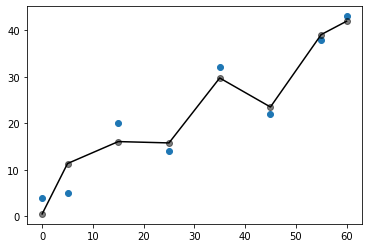

In [88]:
plt.scatter(df_x[0], df_x['y'])
plt.plot(df_x[0], df_x['prediksi'], color="black")
plt.scatter(df_x[0], df_x['prediksi'], color="black", alpha=0.5)

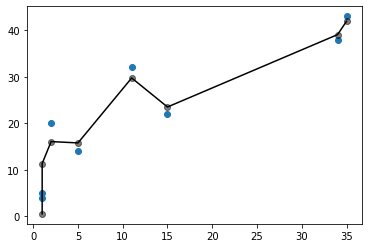

In [90]:
plt.scatter(df_x[1], df_x['y'])
plt.plot(df_x[1], df_x['prediksi'], color="black")
plt.scatter(df_x[1], df_x['prediksi'], color="black", alpha=0.5)